In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sys import stderr

# Read contour data

In [2]:
def read_contour_data(file: str):
    try:
        with open(file, "r") as f:
            return np.array([list(map(float, line.split())) for line in f.readlines()])
    except IOError as e:
        print(f"{e}", file=stderr)
        return np.array([])

In [3]:
x = read_contour_data("../model2_x_2000.txt")
y = read_contour_data("../model2_y_2000.txt")
z = read_contour_data("../model2_z_2000.txt")

# Read maxima data

In [4]:
def read_maxima_data(file: str):
    try:
        maxima = list()
        with open(file, "r") as f:
            lines = f.readlines()

            while len(lines) > 0:
                maximum = dict()
                line = lines.pop(0)
                assert line.startswith("Maximum")

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("theta=")
                line = line.replace("theta=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["theta"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("func_value=")
                line = line.replace("func_value=", "")
                maximum["func_value"] = float(line)

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("grad=")
                line = line.replace("grad=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["grad"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                assert len(line) == 1

                maxima.append(maximum)
        return maxima
    except IOError as e:
        print(f"{e}", file=stderr)
        return []

In [5]:
maxima = read_maxima_data("../model2_maxima_1000.txt")

# Read hypercube data

In [6]:
def read_hypercube_data(file: str):
    try:
        hypercubes = list()
        with open(file, "r") as f:
            lines = f.readlines()

            while len(lines) > 0:
                hc = list()

                line = lines.pop(0)
                assert line.startswith("{")

                for _ in range(2):
                    line = lines.pop(0)
                    line = line.replace(" ", "").replace("\n", "")
                    assert line.startswith("{") and line.endswith("},")
                    line = line.replace("{", "").replace("},", "")
                    hc.append(tuple(map(float, line.split(","))))

                line = lines.pop(0)
                assert line.startswith("},")

                line = lines.pop(0)
                assert len(line) == 1

                hypercubes.append(hc)
        return hypercubes
    except IOError as e:
        print(f"{e}", file=stderr)
        return []

In [7]:
hypercubes = read_hypercube_data("../model2_hypercubes_1000.txt")
merged_hypercubes = read_hypercube_data("../model2_merged_hypercubes_1000.txt")

# Plot data

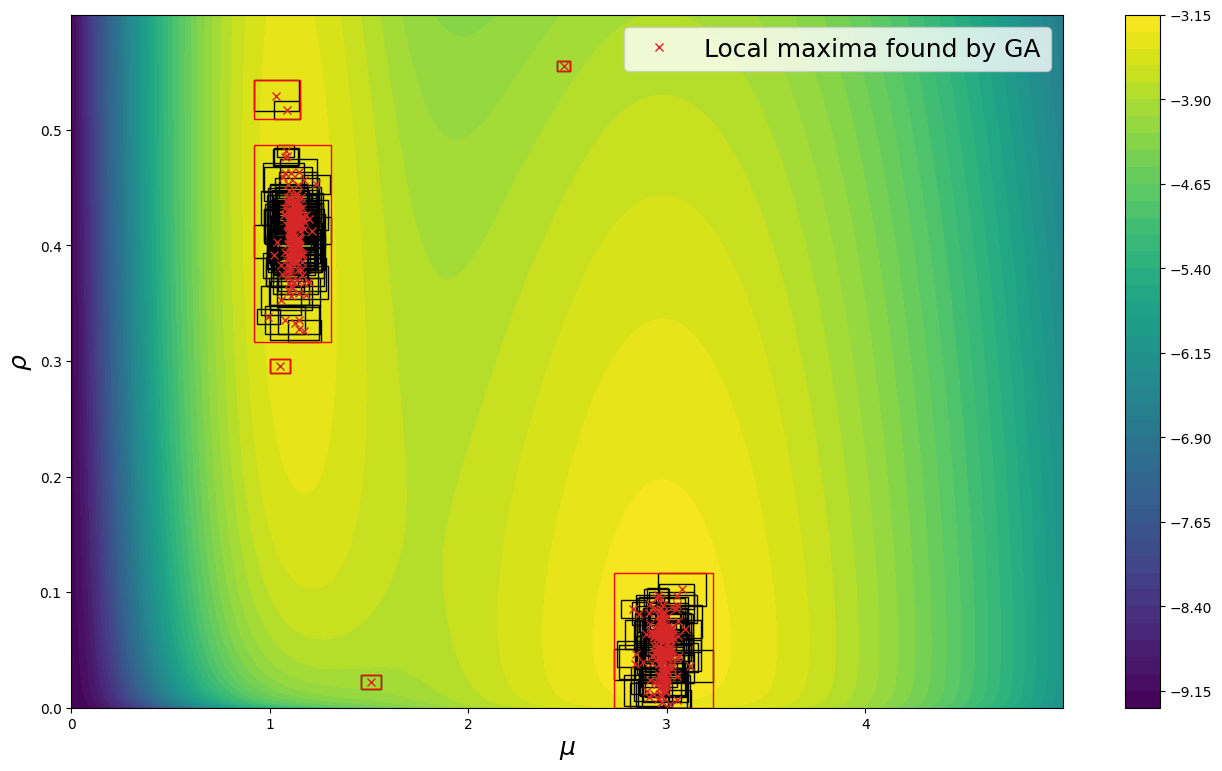

In [8]:
plot_hypercubes = True

plt.figure(figsize=(16, 9))

CS = plt.contourf(x, y, z, 50)
plt.colorbar(CS)

rho_max = [0] * len(maxima)
mu_max  = [0] * len(maxima)
for i, maximum in enumerate(maxima):
    rho_max[i] = maximum["theta"][1]
    mu_max[i]  = maximum["theta"][0]
plt.plot(rho_max, mu_max, linestyle="", marker="x", color="tab:red", label="Local maxima found by GA")

if plot_hypercubes:
    for hc in hypercubes:
        rect = plt.Rectangle(
            xy=[hc[1][0], hc[0][0]],
            width=hc[1][1] - hc[1][0],
            height=hc[0][1] - hc[0][0],
            fc="none",
            ec="black"
        )
        plt.gca().add_patch(rect)

    for hc in merged_hypercubes:
        rect = plt.Rectangle(
            xy=[hc[1][0], hc[0][0]],
            width=hc[1][1] - hc[1][0],
            height=hc[0][1] - hc[0][0],
            fc="none",
            ec="red"
        )
        plt.gca().add_patch(rect)

plt.xlabel("$\\mu$", fontsize=18)
plt.ylabel("$\\rho$", fontsize=18)
plt.legend(fontsize=18)

# plt.savefig("../hypercubes.svg")

plt.show()

In [9]:
min_value = maxima[0]["func_value"]
max_value = maxima[0]["func_value"]
for maximum in maxima:
    min_value = min(min_value, maximum["func_value"])
    max_value = max(max_value, maximum["func_value"])
print(f"min. function value = {min_value}")
print(f"max. function value = {max_value}")

min. function value = -3.7653576715359662
max. function value = -3.217624604518317


In [10]:
print(f"min. contout = {np.min(z)}")
print(f"max. contout = {np.max(z)}")

min. contout = -9.20888
max. contout = -3.21762
